In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10, mnist
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.metrics import Precision, Recall

In [2]:
tf.random.set_seed(1)

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)

block_1_output = layers.MaxPool2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)

block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)

block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(10, activation='softmax')(x)

In [5]:
model = keras.Model(inputs, outputs, name="toy_resnet")

model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy', Precision(), Recall()])

In [6]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 229s 181ms/step - loss: 1.7338 - accuracy: 0.3288 - precision: 0.6015 - recall: 0.0999 - val_loss: 1.4100 - val_accuracy: 0.4784 - val_precision: 0.6676 - val_recall: 0.2661
Epoch 2/10
1250/1250 [==============================] - 229s 183ms/step - loss: 1.2458 - accuracy: 0.5467 - precision: 0.7285 - recall: 0.3607 - val_loss: 1.0239 - val_accuracy: 0.6260 - val_precision: 0.7958 - val_recall: 0.4574
Epoch 3/10
1250/1250 [==============================] - 238s 191ms/step - loss: 1.0184 - accuracy: 0.6338 - precision: 0.7806 - recall: 0.4940 - val_loss: 0.9167 - val_accuracy: 0.6653 - val_precision: 0.7909 - val_recall: 0.5376
Epoch 4/10
1250/1250 [==============================] - 236s 189ms/step - loss: 0.8930 - accuracy: 0.6819 - precision: 0.7989 - recall: 0.5666 - val_loss: 0.8136 - val_accuracy: 0.7157 - val_precision: 0.8064 - val_recall: 0.6343
Epoch 5/10
1250/1250 [==============================] - 238s 190ms/step - loss: 

In [7]:
# Оценка модели на тестовом наборе данных
model.evaluate(x_test, y_test)


313/313 [==============================] - 15s 47ms/step - loss: 0.7574 - accuracy: 0.7530 - precision: 0.8119 - recall: 0.6983


[0.7573796510696411, 0.753000020980835, 0.8118823170661926, 0.6983000040054321]

In [8]:
# Получение истории обучения
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

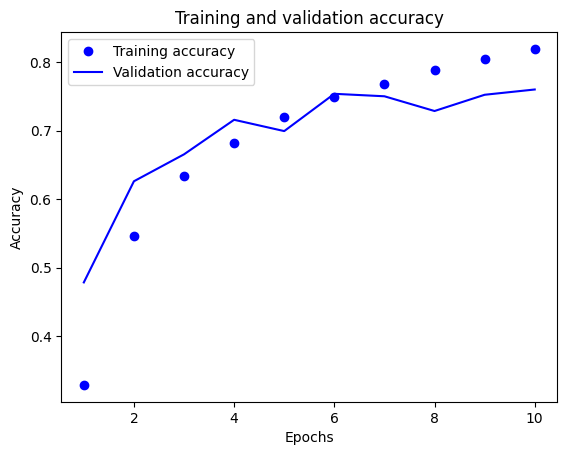

In [9]:
# График точности
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

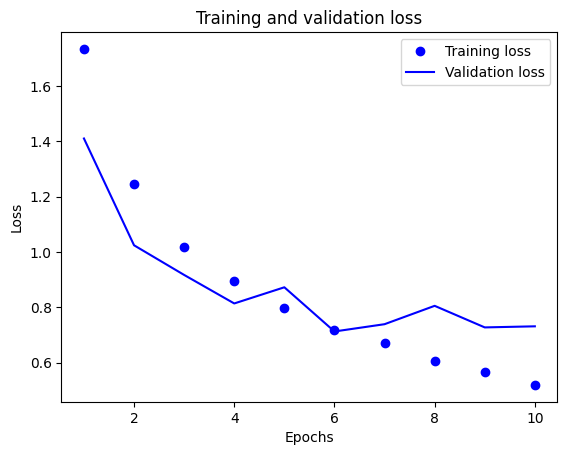

In [10]:
# График потерь
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Получение предсказаний для тестового набора данных
predictions = model.predict(x_test)

313/313 [==============================] - 16s 50ms/step


In [ ]:
# Определение списка названий классов
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

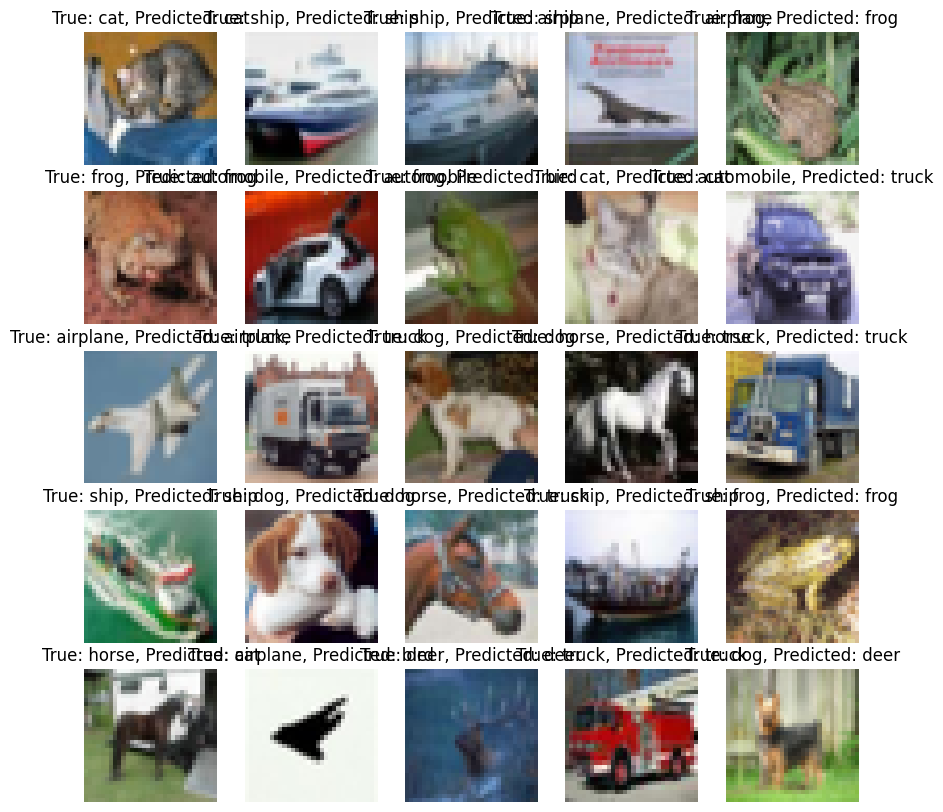

In [ ]:
# Отображение нескольких изображений с их истинными метками и предсказаниями
plt.figure(figsize=(10, 10))
for i in range(25):  # Показываем 25 изображений
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])  # Отображение изображения
    true_label = class_names[np.argmax(y_test[i])]  # Истинное название класса
    predicted_label = class_names[np.argmax(predictions[i])]  # Предсказанное название класса
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')  # Убираем оси координат
plt.show()


In [ ]:
def load_and_predict_image(model, img_path, class_names):
    # Загрузка изображения
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Предсказание класса изображения
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Вывод изображения и предсказанного класса
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted Class: {class_names[predicted_class]}')
    plt.show()

In [ ]:
# Пример использования функции
img_path = 'path_to_your_image.jpg'  # Путь к изображению
class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9']  # Пример названий классов
load_and_predict_image(model, img_path, class_names)

Архитектура нейронной сети включает в себя следующие слои:

Входной слой: Входные изображения имеют размерность 32x32x3 (ширина, высота, количество каналов).
Сверточные слои: В сети используются три сверточных слоя с активацией ReLU и ядром свертки размером 3x3. После каждого сверточного слоя применяется слой максимальной пулинга для уменьшения размерности.
Полносвязные слои: После последнего сверточного слоя следует выравнивающий слой, за которым идут два полносвязных слоя. Первый полносвязный слой имеет 128 нейронов с функцией активации ReLU, а второй слой - 10 нейронов (по числу классов CIFAR-10).
Слои Dropout: После первого полносвязного слоя добавлен слой Dropout с коэффициентом отсева 0.5 для уменьшения переобучения.

В процессе обучения использовались следующие методы настройки:

Регуляризация L2: Были добавлены регуляризаторы L2 для сверточных и полносвязных слоев с коэффициентом регуляризации 0.001 для снижения переобучения.
Слой Dropout: Добавлен слой Dropout после первого полносвязного слоя с коэффициентом отсева 0.5 для уменьшения переобучения.
Оптимизатор Adam: Для компиляции модели использовался оптимизатор Adam для эффективного обновления весов сети.
Увеличение количества эпох: Количество эпох обучения было увеличено до 40 для более глубокого обучения модели.